<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   NILLAI             1427 non-null   int64
 1   Homepage           1427 non-null   int64
 2   Modul Perkuliahan  1427 non-null   int64
 3   Forum              1427 non-null   int64
 4   Tugas              1427 non-null   int64
 5   Kuis               1427 non-null   int64
 6   UTS                1427 non-null   int64
 7   UAS                1427 non-null   int64
 8   Label              1427 non-null   int64
dtypes: int64(9)
memory usage: 100.5 KB


/Users/argana/Library/Caches/pypoetry/virtualenvs/predict-DMXZyKmP-py3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


'Bagus'

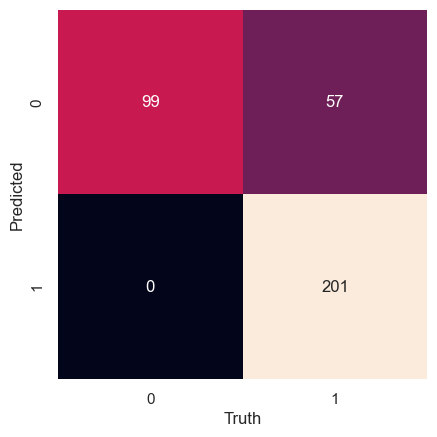

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
# from sklearn.metrics import classification_report



df = pd.read_excel("./data/data.xlsx")
df.head()
df.describe()
df.info()
x = df.drop(["Label"], axis = 1)
y = df["Label"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
modelnb = GaussianNB()

nbtrain = modelnb.fit(x_train, y_train)
nbtrain.class_count_

y_pred = nbtrain.predict(x_test)

pred = modelnb.predict(x_test)

mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
        xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

filename = "../model/model.pkl"

pickle.dump(modelnb, open(filename, 'wb'))
modelnb = pickle.load(open(filename,'rb'))
y_predict = modelnb.predict([[79, 1, 1, 0, 0, 0, 1, 0]])
category = {
  0: "Tidak Bagus",
  1: "Bagus"
}
category[y_predict[0]]